# A* Algorithm
A* algorithm is used for path-finding and graph traversals.  
  
## Why is it used?
Dijkstra follows the path which is the current shortest, but does not look if it is towards the target or not. Hence it is not very optimal. A* is a Dijkstra with an additional heuristic to ensure that the path taken is towards the target.  
  
## How it works?
A heuristic function is defined to find the distance between 2 vertices in the graph.  
The heuristic can be Euclidean distance, Manhattan distance or anything, but it has to be decided.  
  
The g score of a vertex denotes the distance from the start vertex to that vertex.  
The f score of a vertex is the sum of the g score and the heuristic value.  
  
The necessary initializations are made and the start vertex and its f score are pushed into the priority queue, which denotes the open vertices.  
While the priority queue is not empty, each vertex is popped off. If it is the goal vertex, the loop stops and the path is returned. When the queue is empty and the goal vertex is not reached, boolean False value is returned.  
The current vertex is marked as visited. The neigbors of the current vertex are looped through, checking if they are out of bonds or if the path to it is blocked.  
The g and f scores are calculated, and if the calculated f score of the neigbor is less than the current one, the values are assigned and it is pusehed into the priority queue.  
  
## Analysis
Consider a graph of E edges and V vertices.
### Time Complexity
The time complexity depends on the heuristic used. In the worst case, the number of nodes expanded is exponential in the depth of the shortest path. The time complexity is polynomial when the search space is a tree.
  
### Space Complexity
For each vertex, the vertex which it came from, the f score and g score are stored. Also, the priotiy queue and visited set may contain all the vertices. Hence space complexity is O(V)

## Imports

In [1]:
import sys
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze, INF

from heapq import heappush, heappop

## Heuristic Function

In [2]:
def Heuristic(a, b):
    # The heurisitc used is Manhattan distance since only 4 directions are possible from a particular point
    return abs(a[0]-b[0])+abs(a[1]-b[1])

## A* Function

In [3]:
def AStar(maze, start, goal):
    # Declarations
    neighbors = [(1,0,"S"),(-1,0,"N"),(0,1,"E"),(0,-1,"W")]
    visited=set()
    cameFrom={}
    gScore={start:0}
    fScore={start:Heuristic(start, goal)}
    priorityQ=[]
    # Initialising the proprity queue with the start node and its f score
    heappush(priorityQ, (fScore[start],start))
    # Looping till the priority queue is empty
    while priorityQ:
        current = heappop(priorityQ)[1]
        # Stops and returns the path if the current node is the target node
        if current == goal:
            path=[]
            while current in cameFrom:
                path.append(current)
                current = cameFrom[current]
            path = path + [start]
            path = path[::-1]
            return path 
        # Marking current node as visited
        visited.add(current)

        for i,j,k in neighbors:
            neighbor=(current[0]+i, current[1]+j)
            # Checking if the neighbor is out of bounds or if the path to the neighbor is blocked
            if neighbor[0] < 0 or neighbor[0] >= len(maze.grid[0]):
                continue
            if neighbor[1] < 0 or neighbor[1] >= len(maze.grid):
                continue
            if maze.grid[current[0]][current[1]].neighbors[k] == INF:
                continue
            # Caloculating g and f scores
            tentative_gScore = gScore[current] + maze.grid[current[0]][current[1]].neighbors[k]
            tentative_fScore = tentative_gScore + Heuristic(neighbor, goal)
            # Checking if the current f score is less than or equal to the calculated one
            if neighbor in visited and tentative_fScore >= fScore.get(neighbor, INF):
                continue
            # Checking if the current f score is greater than the calculated one
            if tentative_fScore < fScore.get(neighbor, INF):
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = tentative_fScore
                heappush(priorityQ, (fScore[neighbor], neighbor))
    return False    # Path does not exist

## Main

Path: 
[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 8), (7, 8), (7, 9), (7, 10), (8, 10), (9, 10), (9, 11), (9, 12), (10, 12), (11, 12), (11, 13), (11, 14), (12, 14), (13, 14), (13, 15), (14, 15), (15, 15)]


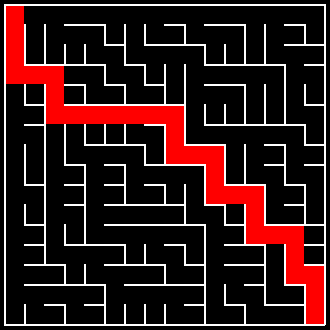

In [4]:
maze = Maze()
maze.load("BinaryTree_16x16.maze")

start = (0, 0)
goal = (15, 15)

print("Path: ")
path = AStar(maze, start, goal)
if path==False:
    print("No path exists")
else:
    print(path)
    
maze.add_colors(path=path)
display(maze.draw(cell_width=20))

In [ ]:
maze = Maze()
maze.load("Aldous-Broder_16x16.maze")

start = (0, 0)
goal = (15, 15)

print("Path: ")
path = AStar(maze, start, goal)
if path==False:
    print("No path exists")
else:
    print(path)
    
maze.add_colors(path=path)
display(maze.draw(cell_width=20))

In [ ]:
maze = Maze()
maze.load("Kruskals_16x16.maze")

start = (0, 0)
goal = (15, 15)

print("Path: ")
path = AStar(maze, start, goal)
if path==False:
    print("No path exists")
else:
    print(path)

maze.add_colors(path=path)
display(maze.draw(cell_width=20))